# Plasticity extension elements statically determinate 1

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some plasticity!


In [ ]:
import micropip
await micropip.install("ipympl")

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import sympy as sym

import ipywidgets as widgets
#from IPython.display import display

%matplotlib widget

In [6]:
wM = sym.symbols('wM',real=True,positive=True)
deltawAM = sym.symbols('deltawAM',real=True)
E = sym.nsimplify(200e9)
A1 = sym.nsimplify(10e-6)
fy = sym.nsimplify(500e6)
L = 6
bm = 2
kA = E * A1 / 6
kB = E * A1 / 10
wAz = wM-deltawAM/3*(6-bm)
wBz = wM+deltawAM/3*bm
wBx = sym.cos(deltawAM/(L/(bm/6)))*6

FA = sym.Piecewise((kA *  wAz,kA * wAz <= fy*A1), (fy*A1, True))
FB = sym.Piecewise((kB *  wBz,kB * wBz <= fy*A1), (fy*A1, True))
F = sym.symbols('F',real=True,positive=True)
eq1 = sym.Eq(FA + FB - F,0)
eq2 = sym.Eq(F * (6-bm) - FB * 6,0)
F_sol = sym.solve(eq1,F)[0]
deltawAM_sol = sym.solve(eq2.subs(F,F_sol),deltawAM)
w_lim = float(deltawAM_sol[0].args[0][1].rhs)
deltawAM_sol = sym.Piecewise((deltawAM_sol[0].args[0][0], deltawAM_sol[0].args[0][1]), (deltawAM_sol[1].args[0][0], deltawAM_sol[1].args[0][1]))

eps = sym.symbols('eps',real=True,positive=True)
sigmaA = FA.subs(deltawAM,deltawAM_sol)/A1
epsA = wAz.subs(deltawAM,deltawAM_sol)/6
sigmaB = FB.subs(deltawAM,deltawAM_sol)/A1
epsB = wBz.subs(deltawAM,deltawAM_sol)/10

In [7]:
wAz_nump = sym.lambdify(wM,wAz.subs(deltawAM,deltawAM_sol))
wBz_nump = sym.lambdify(wM,wBz.subs(deltawAM,deltawAM_sol))
wBx_nump = sym.lambdify(wM,wBx.subs(deltawAM,deltawAM_sol))
sigmaA_nump = sym.lambdify(wM,sigmaA)
sigmaB_nump = sym.lambdify(wM,sigmaB)
epsA_nump = sym.lambdify(wM,epsA)
epsB_nump = sym.lambdify(wM,epsB)
F_nump = sym.lambdify(wM,F_sol.subs(deltawAM,deltawAM_sol))

interactive(children=(FloatSlider(value=0.0, description='w:', max=0.2, step=0.0001), Output()), _dom_classes=…

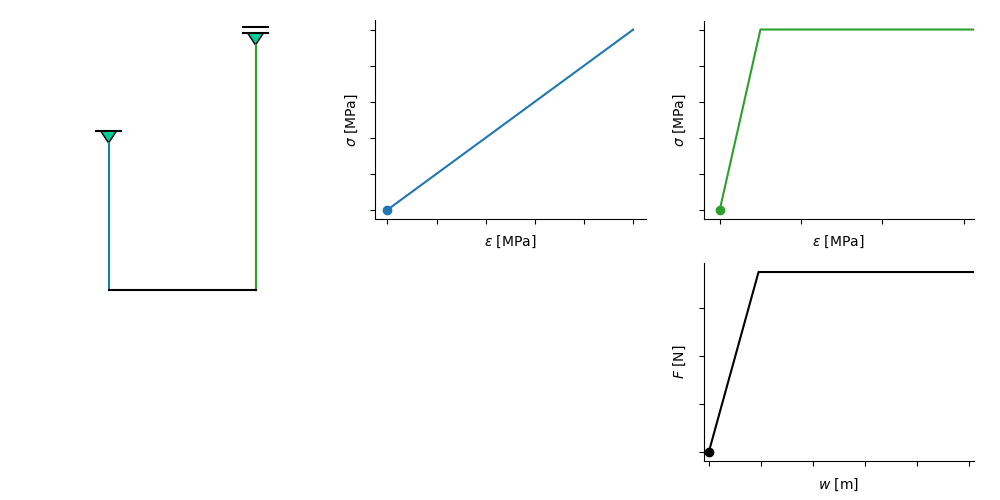

In [9]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_aspect('equal')
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,6)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
fig.tight_layout()
wM_list = np.array([0,w_lim,0.2])
scale = 30

def update_plot(w):
    wM_num = w
    ax1.clear()  # Clear the existing plot
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax1.set_xlim([-1,7])
    ax1.set_ylim([-7,11])
    ax1.plot([0,0],[-wAz_nump(wM_num)*scale,6])
    # Get the color of the previous plot
    color1 = ax1.get_lines()[-1].get_color()
    ax1.plot([wBx_nump(wM_num),wBx_nump(wM_num)],[-wBz_nump(wM_num)*scale,10])
    if wM_num < w_lim:
        ax1.plot([wBx_nump(wM_num),wBx_nump(wM_num)],[-wBz_nump(wM_num)*scale,10])
    else:
        ax1.plot([wBx_nump(wM_num),wBx_nump(wM_num)],[-wBz_nump(wM_num)*scale,10],linewidth=3)
    color2 = ax1.get_lines()[-1].get_color()
    ax1.plot([0,wBx_nump(wM_num)],[-wAz_nump(wM_num)*scale,-wBz_nump(wM_num)*scale],color='black')
    ax1.annotate('', xy=(wBx_nump(wM_num)*((6-bm)/6), -w*scale), xytext=(wBx_nump(wM_num)*((6-bm)/6), 0) , arrowprops=dict(arrowstyle='fancy'))
    ax1.axis('off')

    y1 = np.array([[0-1/3,6+1/2], [0+0,6+0], [0+1/3,6+1/2]])
    p1 = Polygon(y1, facecolor = '#00CC99',edgecolor='black')
    ax1.add_patch(p1)
    ax1.plot([0-1/2,0+1/2],[6+1/2,6+1/2],color='black')

    y2 = np.array([[wBx_nump(wM_num)-1/3,10+1/2], [wBx_nump(wM_num)+0,10+0], [wBx_nump(wM_num)+1/3,10+1/2]])
    p2 = Polygon(y2, facecolor = '#00CC99',edgecolor='black')
    ax1.add_patch(p2)
    ax1.plot([wBx_nump(wM_num)-1/2,wBx_nump(wM_num)+1/2],[10+1/2,10+1/2],color='black')
    ax1.plot([wBx_nump(wM_num)-1/2,wBx_nump(wM_num)+1/2],[10+1/2+1/4,10+1/2+1/4],color='black')

    ax3.plot(epsB_nump(wM_list),sigmaB_nump(wM_list)/1e6,color=color2)
    ax3.plot(epsB_nump(wM_num),sigmaB_nump(wM_num)/1e6,'o',color=color2)
    ax3.set_ylabel('$\sigma$ [MPa]')
    ax3.set_xlabel('$\epsilon$ [MPa]')
    ax3.set_xlim([-0.001,max(epsB_nump(0.1)+0.001,epsB_nump(wM_num)+0.001)])

    ax2.plot(epsA_nump(wM_list),sigmaA_nump(wM_list)/1e6,color=color1)
    ax2.plot(epsA_nump(wM_num),sigmaA_nump(wM_num)/1e6,'o',color=color1)
    ax2.set_ylabel('$\sigma$ [MPa]')
    ax2.set_xlabel('$\epsilon$ [MPa]')

    ax4.plot(wM_list,F_nump(wM_list),color='black')
    ax4.plot(wM_num,F_nump(wM_num),'o',color='black')
    ax4.set_ylabel('$F$ [N]')
    ax4.set_xlabel('$w$ [m]')
    ax4.set_xlim([0-0.002,max(0.1+0.002,wM_num+0.002)])

    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax3.set_yticklabels([])
    ax3.set_xticklabels([])
    ax4.set_yticklabels([])
    ax4.set_xticklabels([])
    
    plt.draw()  

w_slider = widgets.FloatSlider(value=0, min=0, max=0.2, step=0.0001, description='w:')
widgets.interact(update_plot, w = w_slider);